# Logist Regression in dataset heart.csv

In [1]:
# conectando drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score

In [3]:
# lendo dataset (diponível no GitHub) 
url = 'https://raw.githubusercontent.com/MpRonald/Machine-Learning/main/heart.csv'
data = pd.read_csv(url, sep=',')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# traduzindo colunas
data.columns = ['idade', 'sexo', 'tipo_dor_peito', 'pressao_arterial_repouso', 'colesterol_serico',
                    'glicemia_jejum', 'resultado_eletro', 'freq_cardiaca_max', 'angina_induzida',
                    'depressao_st', 'inclinacao_st', 'num_vasos_coloridos', 'nivel_reversao', 'target']

In [6]:
data.columns

Index(['idade', 'sexo', 'tipo_dor_peito', 'pressao_arterial_repouso',
       'colesterol_serico', 'glicemia_jejum', 'resultado_eletro',
       'freq_cardiaca_max', 'angina_induzida', 'depressao_st', 'inclinacao_st',
       'num_vasos_coloridos', 'nivel_reversao', 'target'],
      dtype='object')

In [7]:
# verificando dados nulos
data.isnull().sum()

idade                       0
sexo                        0
tipo_dor_peito              0
pressao_arterial_repouso    0
colesterol_serico           0
glicemia_jejum              0
resultado_eletro            0
freq_cardiaca_max           0
angina_induzida             0
depressao_st                0
inclinacao_st               0
num_vasos_coloridos         0
nivel_reversao              0
target                      0
dtype: int64

In [8]:
data.shape

(303, 14)

In [9]:
data.describe

<bound method NDFrame.describe of      idade  sexo  tipo_dor_peito  ...  num_vasos_coloridos  nivel_reversao  target
0       63     1               3  ...                    0               1       1
1       37     1               2  ...                    0               2       1
2       41     0               1  ...                    0               2       1
3       56     1               1  ...                    0               2       1
4       57     0               0  ...                    0               2       1
..     ...   ...             ...  ...                  ...             ...     ...
298     57     0               0  ...                    0               3       0
299     45     1               3  ...                    0               3       0
300     68     1               0  ...                    2               3       0
301     57     1               0  ...                    1               3       0
302     57     0               1  ...                

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     303 non-null    int64  
 1   sexo                      303 non-null    int64  
 2   tipo_dor_peito            303 non-null    int64  
 3   pressao_arterial_repouso  303 non-null    int64  
 4   colesterol_serico         303 non-null    int64  
 5   glicemia_jejum            303 non-null    int64  
 6   resultado_eletro          303 non-null    int64  
 7   freq_cardiaca_max         303 non-null    int64  
 8   angina_induzida           303 non-null    int64  
 9   depressao_st              303 non-null    float64
 10  inclinacao_st             303 non-null    int64  
 11  num_vasos_coloridos       303 non-null    int64  
 12  nivel_reversao            303 non-null    int64  
 13  target                    303 non-null    int64  
dtypes: float64

In [11]:
data.duplicated().sum()

1

In [12]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [13]:
X = data.drop(columns='target')
X.head()

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol_serico,glicemia_jejum,resultado_eletro,freq_cardiaca_max,angina_induzida,depressao_st,inclinacao_st,num_vasos_coloridos,nivel_reversao
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
y = data.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [16]:
X_train.shape, y_train.shape

((242, 13), (242,))

In [17]:
X_test.shape, y_test.shape

((61, 13), (61,))

In [18]:
# logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

accuracy_lr = lr.score(X_train, y_train)
round(accuracy_lr, 3)

0.884

In [19]:
# decicion tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt = dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
round(accuracy_dt, 3)*100

72.1

In [20]:
# cross validation Logistic Regression
prediction_lr = lr.predict(X_test)
prediction_lr

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [21]:
# cross validation Logistic Regression
prediction_dt = dt.predict(X_test)
prediction_dt

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


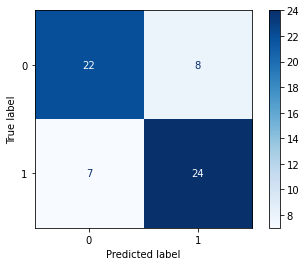

In [23]:
# Matriz de confusão Linear Regression
conf_matrix = plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


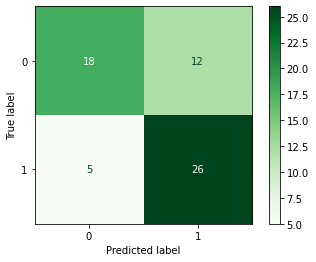

In [25]:
# Matriz de confusão Decision Tree
conf_matrix = plot_confusion_matrix(dt, X_test, y_test, cmap='Greens')

In [26]:
# utilizando o classification report Logistic Regression
print(classification_report(y_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        30
           1       0.75      0.77      0.76        31

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [27]:
# utilizando o classification report Decision Tree
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68        30
           1       0.68      0.84      0.75        31

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



In [28]:
prob_lr = lr.predict_proba(X_test)[:,1]
fpr, tpr, limit = roc_curve(y_test, prob_lr) # define a curva ROC
roc_lienar_reg = roc_auc_score(y_test, prob_lr)
# calculo da area sobre a curva ROC
round(roc_lienar_reg, 3)

0.866

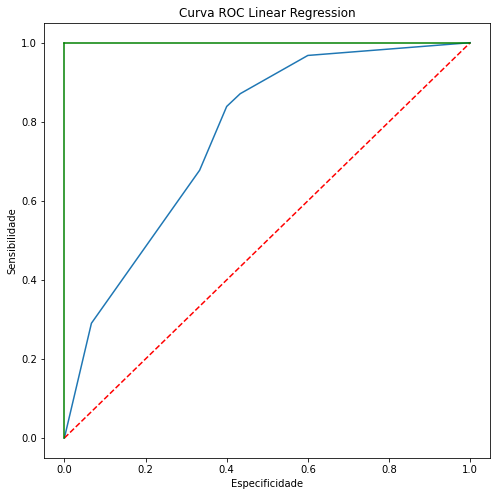

In [30]:
plt.subplots(1, figsize=(8,8))
plt.title("Curva ROC Linear Regression")
plt.plot(fpr, tpr)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
plt.show()

In [29]:
prob_dt = dt.predict_proba(X_test)[:,1]
fpr, tpr, limit = roc_curve(y_test, prob_dt) # define a curva ROC
roc_lienar_reg = roc_auc_score(y_test, prob_dt)
# calculo da area sobre a curva ROC
round(roc_lienar_reg, 3)

0.765

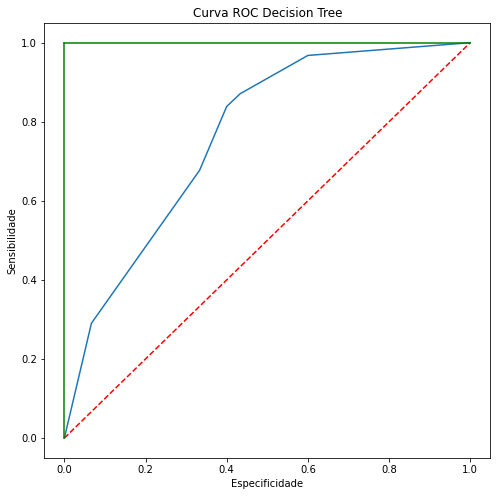

In [33]:
plt.subplots(1, figsize=(8,8))
plt.title("Curva ROC Decision Tree")
plt.plot(fpr, tpr)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
plt.show()